In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

from selenium import webdriver

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jk/scikit_learn_data


In [5]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.2, random_state=0)

In [13]:
X_train0.shape

(320, 64, 64)

In [11]:
X_train = X_train0[:,:,:, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:,:,:, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, 

((320, 64, 64, 1), (80, 64, 64, 1), (320, 40), (80, 40))

In [52]:
np.random.seed(0)

model1 = Sequential()


model1.add(Conv2D(20, (5, 5), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_normal"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model1.add(Dense(40, activation='softmax', kernel_initializer='glorot_normal'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

TypeError: The added layer must be an instance of class Layer. Found: <class 'keras.layers.core.Dropout'>

In [ ]:
model1.summary()

In [ ]:
np.random.seed(0)

model = Sequential()


model.add(Conv2D(32, (8, 8), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_normal"))
model.add(MaxPooling2D())
model.add(Conv2D(32, (8, 8), activation='relu', padding='same', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.3))
model.add(Dense(40, activation='softmax', kernel_initializer='glorot_normal'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 50)        3250      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 50)        62550     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1638528   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

In [ ]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=500, batch_size=16, validation_data=(X_test, Y_test), verbose=2)

In [ ]:
plt.plot(hist.history1['acc'], 'b-', label='training')
plt.plot(hist.history1['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

In [50]:
%%time
hist = model.fit(X_train, Y_train, epochs=500, batch_size=16, validation_data=(X_test, Y_test), verbose=2)

Train on 320 samples, validate on 80 samples
Epoch 1/500
 - 6s - loss: 3.6971 - acc: 0.0219 - val_loss: 3.6907 - val_acc: 0.0125
Epoch 2/500
 - 5s - loss: 3.6888 - acc: 0.0187 - val_loss: 3.6935 - val_acc: 0.0000e+00
Epoch 3/500
 - 5s - loss: 3.6880 - acc: 0.0250 - val_loss: 3.6956 - val_acc: 0.0000e+00
Epoch 4/500
 - 5s - loss: 3.6879 - acc: 0.0281 - val_loss: 3.6983 - val_acc: 0.0000e+00
Epoch 5/500
 - 5s - loss: 3.6868 - acc: 0.0406 - val_loss: 3.7005 - val_acc: 0.0000e+00
Epoch 6/500
 - 5s - loss: 3.6866 - acc: 0.0219 - val_loss: 3.7028 - val_acc: 0.0000e+00
Epoch 7/500
 - 5s - loss: 3.6861 - acc: 0.0344 - val_loss: 3.7053 - val_acc: 0.0000e+00
Epoch 8/500
 - 5s - loss: 3.6862 - acc: 0.0250 - val_loss: 3.7071 - val_acc: 0.0000e+00
Epoch 9/500
 - 5s - loss: 3.6852 - acc: 0.0281 - val_loss: 3.7100 - val_acc: 0.0000e+00
Epoch 10/500
 - 5s - loss: 3.6845 - acc: 0.0312 - val_loss: 3.7127 - val_acc: 0.0000e+00
Epoch 11/500
 - 5s - loss: 3.6842 - acc: 0.0312 - val_loss: 3.7158 - val_acc: 

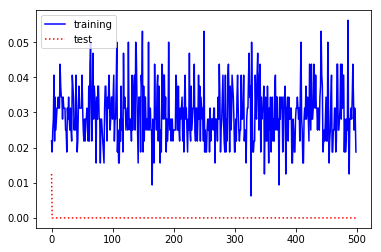

In [51]:
plt.plot(hist.history['acc'], 'b-', label='training')
plt.plot(hist.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()